Выберите наборы данных. которые можно интерпретировать, как временные ряды:
а) зависимость цены на недвижимость в конкретном регионе от времени,
б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
в) количество отказов компьютера,
г) число обращений в поликлинику по району,
д) координаты автобуса при движении по маршруту,
е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

а) да (цена-время)
б) да (если у нас есть фактор с изменением скорости на разных промежутках времени
в) опятьже да, если у нас указан временной интервал (пн 5 отказов вт 6 ср 4...)
г) аналогично с в
... все пункты подходят, если есть столбец с регулярным хронометражем

Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
df_duq = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [21]:
df_duq.head(10)

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0
2005-12-31 06:00:00,1372.0
2005-12-31 07:00:00,1402.0
2005-12-31 08:00:00,1425.0
2005-12-31 09:00:00,1502.0


In [5]:
df_duq.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [6]:
df_duq.isnull().sum()

DUQ_MW    0
dtype: int64

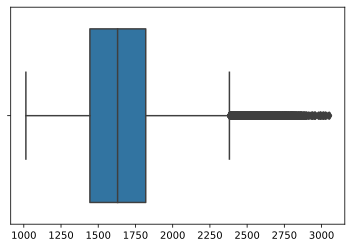

In [7]:
sns.boxplot(df_duq.values);

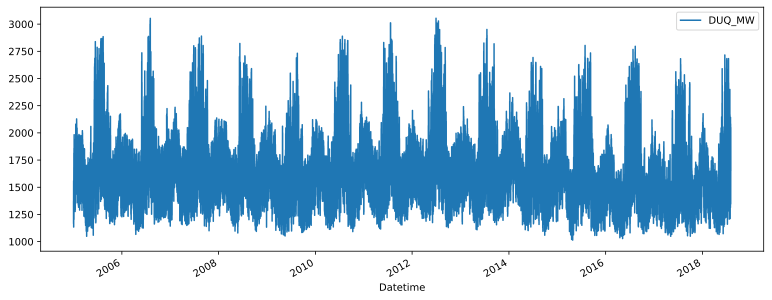

In [22]:
df_duq.plot(figsize = (13, 5));

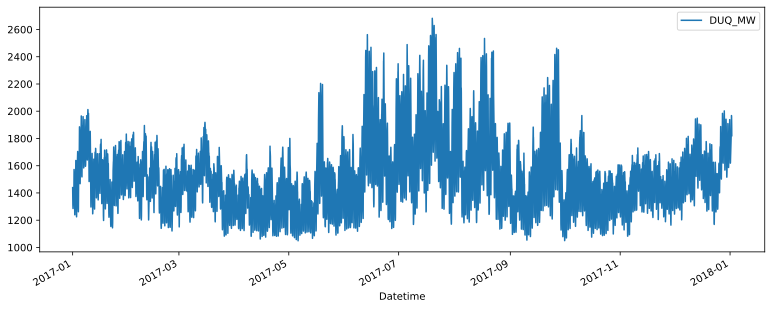

In [25]:
df_duq['2017-01-01':'2018-01-01'].plot(figsize=(13,5));

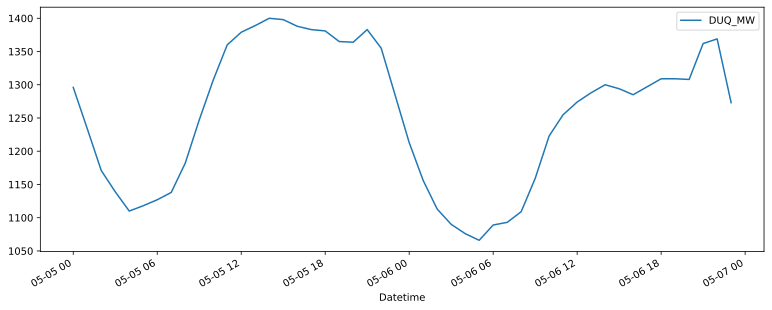

In [26]:
df_duq['2018-05-05':'2018-05-06'].plot(figsize=(13,5));

Пропусков нет, Заметна цикличность.как сезонная, так и суточная, выбросы есть, но незначительные

3.Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [11]:
df_brent = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])

In [27]:
df_brent.head(10)

,Значение
Дата,
2010-09-01,76.37
2010-09-02,76.89
2010-09-03,76.57
2010-09-04,76.62
2010-09-05,76.63
2010-09-06,76.87
2010-09-07,77.26
2010-09-08,77.93
2010-09-09,77.21


In [13]:
df_brent.sort_index(inplace=True)

In [14]:
df_brent

,Значение
Дата,
2010-09-01,76.37
2010-09-02,76.89
2010-09-03,76.57
2010-09-04,76.62
2010-09-05,76.63
...,...
2019-08-27,59.59
2019-08-28,59.84
2019-08-29,60.37


In [15]:
df_brent.describe()

,Значение
count,2667.000000
mean,81.533547
std,26.349469
min,27.850000
25%,56.840000
50%,77.710000
75%,108.190000
max,126.900000


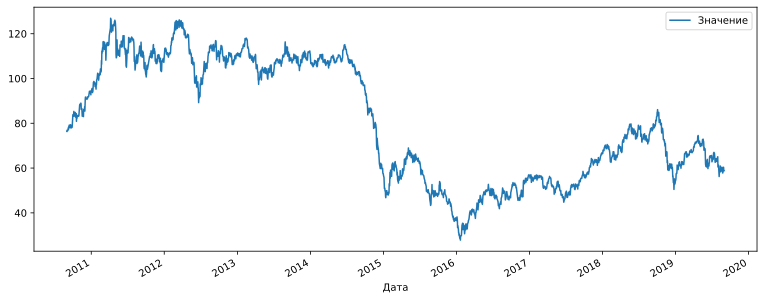

In [28]:
df_brent.plot(figsize=(13,5));

In [31]:
df_brent_week = df_brent.resample('W').mean()
df_brent_week.head(10)

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667
2010-10-10,84.146667
2010-10-17,83.498333
2010-10-24,82.795000
2010-10-31,83.361667


In [32]:
df_brent_mounth = df_brent.resample('M').mean()
df_brent_mounth.head(10)

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200
2011-02-28,104.451250
2011-03-31,114.811538
2011-04-30,123.197826
2011-05-31,114.345385


Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

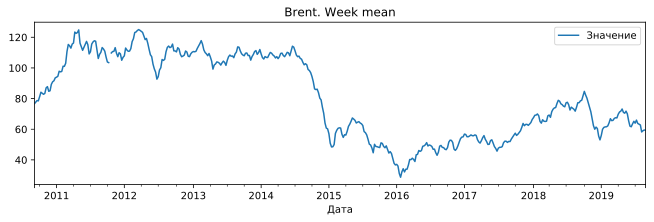

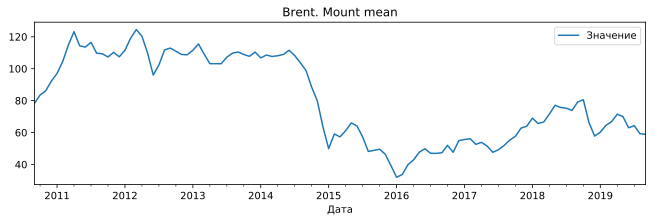

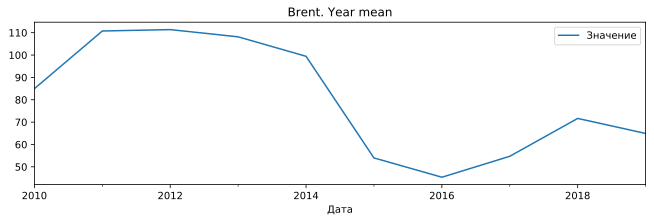

In [36]:
df_brent_week.plot(figsize=(11,3), title='Brent. Week mean')
df_brent_mounth.plot(figsize=(11,3), title='Brent. Mount mean')
df_brent.resample('A').mean().plot(figsize=(11,3), title='Brent. Year mean');

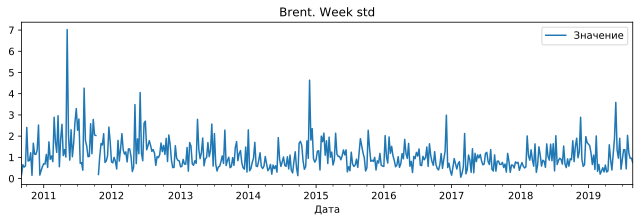

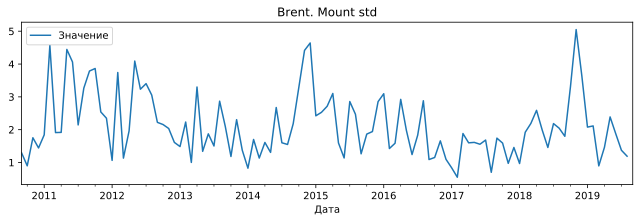

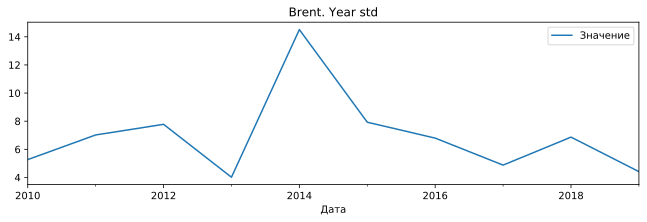

In [38]:
df_brent.resample('W').std().plot(figsize=(11,3), title='Brent. Week std')
df_brent.resample('M').std().plot(figsize=(11,3), title='Brent. Mount std')
df_brent.resample('A').std().plot(figsize=(11,3), title='Brent. Year std');

Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

С увеличеснием интервала, идет потеря данных, но уходят выбросы, колебания. . в зависимости от задачи, можно использовать каждый из графиков, в зависимости от того, имеет для нас значение колебаний на более коротких интервалах или нет